In [1]:
%matplotlib notebook
import pylab
pylab.rcParams['figure.figsize'] = (10, 10)


from matplotlib import colors
from matplotlib.patches import Ellipse
from scipy import linalg
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import numpy as np
import matplotlib.pyplot as plt

In [2]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [3]:
def GenData(n_classes, N_perclass, D=2, seed=0):
    np.random.seed(seed)
    mus = [np.random.randn(D) for i in range(n_classes)]
    sigmas1 = [np.diag(np.abs(np.random.randn(D))) for i in range(n_classes)]
    thetas = np.pi * np.random.randn(n_classes)
    rotmats = [np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]]) for theta in thetas]
    sigmas = [np.dot(sig, rot) for (sig, rot) in zip(sigmas1, rotmats)]
    
    X = np.zeros([np.sum(N_perclass), D])
    y = np.zeros(np.sum(N_perclass))
    n_tmp = 0
    for (i, n) in enumerate(N_perclass):
        X[n_tmp:n_tmp + n] = np.random.multivariate_normal(mus[i], sigmas[i], n)
        y[n_tmp:n_tmp + n] = i
        n_tmp += n
        
    
    return X, y, mus, sigmas

In [4]:
X, y, mus, sigmas = GenData(2, [200, 200])

# Fit LDA
lda = LinearDiscriminantAnalysis(solver='svd', store_covariance=True)
lda.fit(X, y)
# Fit QDA
qda = QuadraticDiscriminantAnalysis(store_covariances=True)
qda.fit(X, y)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=True, tol=0.0001)

In [5]:
# Useful for plotting predictions of LDA & QDA
xx, yy = np.meshgrid(np.linspace(-3, 6, 400), np.linspace(-3, 6, 400))
Z_qda = qda.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_lda = lda.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# This code is adopted from code available on sklearn for drawing ellipses
# at http://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html#sphx-glr-auto-examples-classification-plot-lda-qda-py
def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, edgecolor=color, fill=None,
                              linewidth=4, zorder=2)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())    

<IPython.core.display.Javascript object>


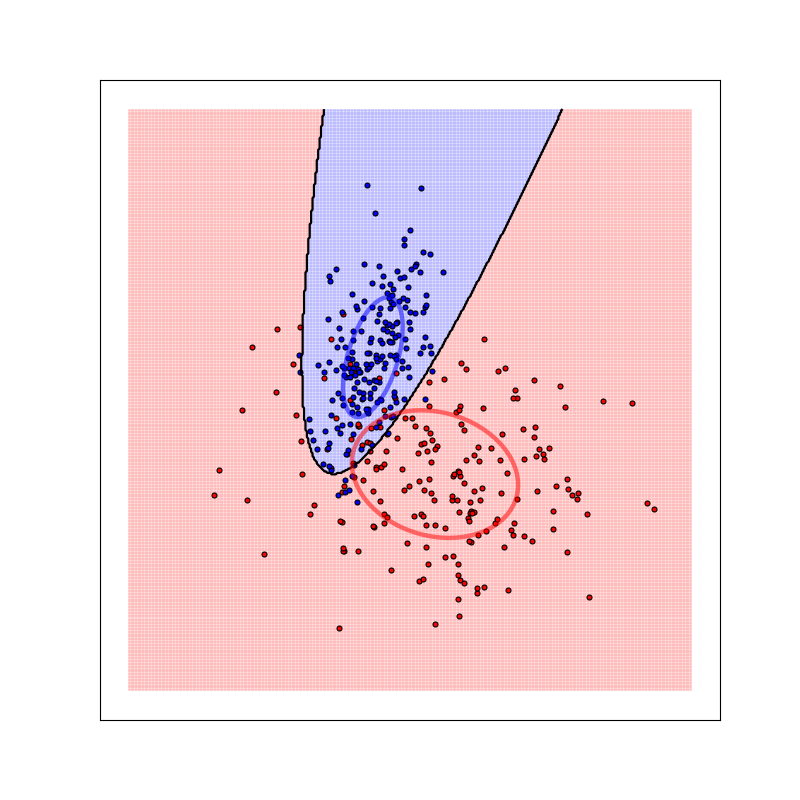

In [6]:
# Make QDA figure
fig = plt.figure()
splot = fig.add_subplot(1, 1, 1)

# Plot predicted class labels
splot.pcolormesh(xx, yy, Z_qda, cmap='red_blue_classes', norm=colors.Normalize(0., 1.), alpha=0.4)

# Plot actual data
splot.scatter(X[:200, 0], X[:200, 1], c='r')
splot.scatter(X[200:, 0], X[200:, 1], c='b')

# Plot decision boundary
splot.contour(xx, yy, Z_qda, [0.5], linewidths=2., colors='k')

# Plot ellipses around estimated means with appropriate covariance
plot_ellipse(splot, qda.means_[0], qda.covariances_[0], 'red')
plot_ellipse(splot, qda.means_[1], qda.covariances_[1], 'blue')

<IPython.core.display.Javascript object>


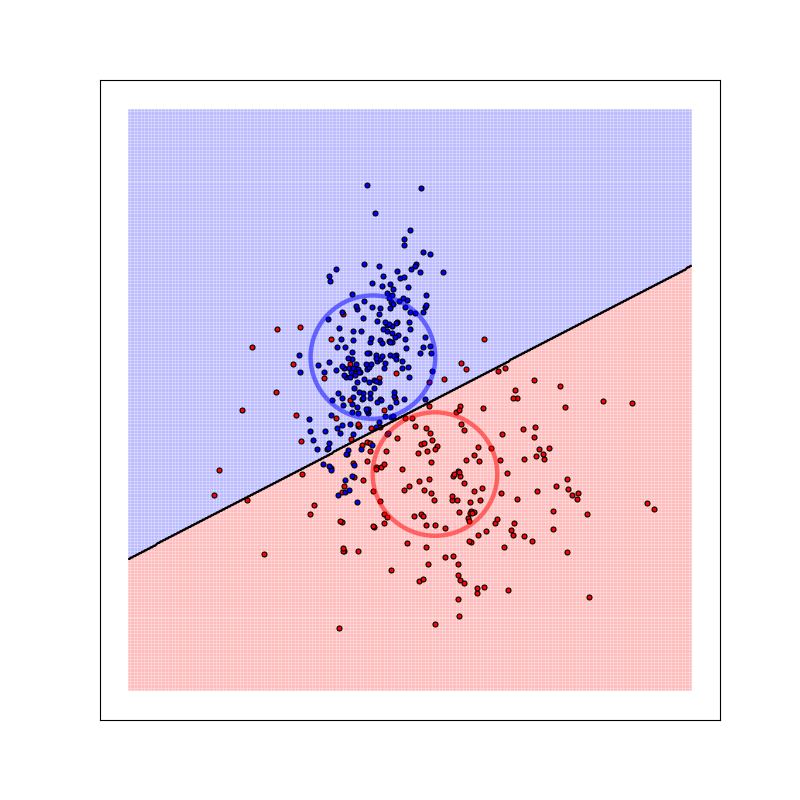

In [7]:
# Make LDA figure
fig = plt.figure()
splot = fig.add_subplot(1, 1, 1)

# Plot predicted class labels
splot.pcolormesh(xx, yy, Z_lda, cmap='red_blue_classes', norm=colors.Normalize(0., 1.), alpha=0.4)

# Plot actual data
splot.scatter(X[:200, 0], X[:200, 1], c='r')
splot.scatter(X[200:, 0], X[200:, 1], c='b')

# Plot decision boundary
splot.contour(xx, yy, Z_lda, [0.5], linewidths=2., colors='k')

# Plot ellipses around estimated means with appropriate covariance
plot_ellipse(splot, lda.means_[0], lda.covariance_, 'red')
plot_ellipse(splot, lda.means_[1], lda.covariance_, 'blue')